### 1. csv 파일 불러오기

In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from deepchem.feat.molecule_featurizers import RDKitDescriptors
from rdkit import Chem
from rdkit.Chem import Descriptors
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

No normalization for SPS. Feature removed!
No normalization for AvgIpc. Feature removed!
Skipped loading some Tensorflow models, missing a dependency. No module named 'tensorflow'
Skipped loading modules with pytorch-geometric dependency, missing a dependency. No module named 'dgl'
Skipped loading modules with pytorch-lightning dependency, missing a dependency. No module named 'lightning'
Skipped loading some Jax models, missing a dependency. No module named 'jax'
Skipped loading some PyTorch models, missing a dependency. No module named 'tensorflow'


In [3]:
warnings.filterwarnings('ignore')           # 출력 창 경고 메시지 무시
plt.rcParams['axes.unicode_minus'] = False  # 음수부호 깨짐 관련
plt.rcParams['font.family'] = 'Malgun Gothic' # window 전용 한글 폰트 설정

In [4]:
train_df = pd.read_csv('../rdkit_data/rdkit_train_corr_0.3.csv')
test_df = pd.read_csv('../rdkit_data/rdkit_test_corr_0.3.csv')

##### 1) 상관계수 0.3 이상 feature importance
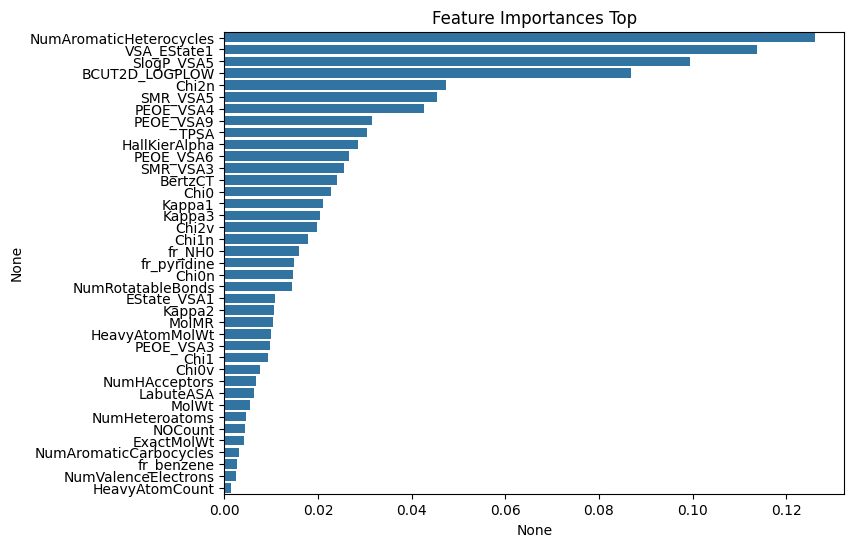
##### top10
NumAromaticHeterocycles    0.126144   
VSA_EState1                0.113756   
SlogP_VSA5                 0.099396   
BCUT2D_LOGPLOW             0.086893   
Chi2n                      0.047403   
SMR_VSA5                   0.045330   
PEOE_VSA4                  0.042557   
PEOE_VSA9                  0.031458   
TPSA                       0.030484   
HallKierAlpha              0.028509

##### 2) 상관계수 0.4 이상 feature importance
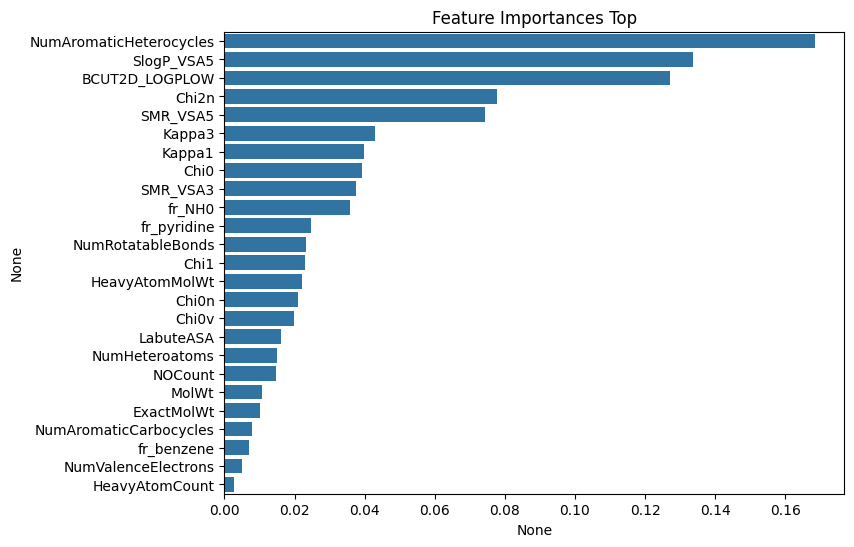
##### top10
NumAromaticHeterocycles    0.168440   
SlogP_VSA5                 0.133687   
BCUT2D_LOGPLOW             0.127009   
Chi2n                      0.077621   
SMR_VSA5                   0.074219   
Kappa3                     0.043036   
Kappa1                     0.039702   
Chi0                       0.039309   
SMR_VSA3                   0.037493   
fr_NH0                     0.035714   

##### 3) 상관계수 0.45 이상 feature importance
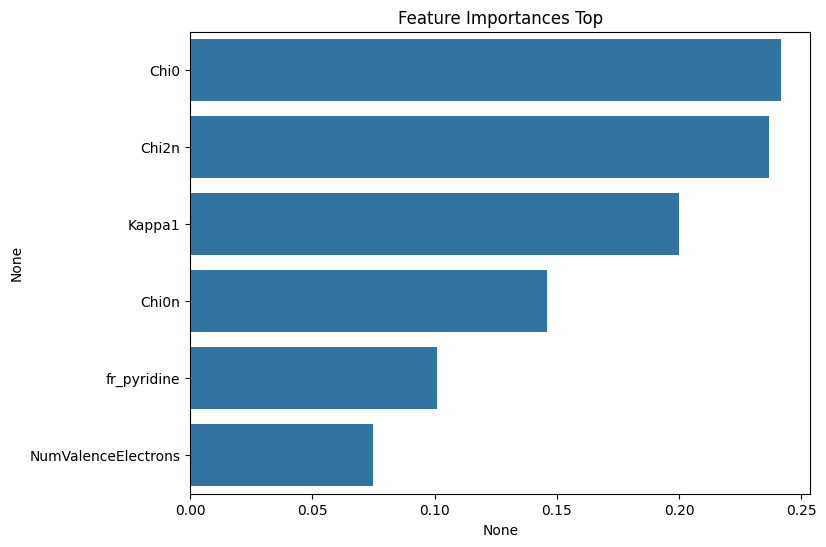
##### top5
Chi0                   0.241578   
Chi2n                  0.236681   
Kappa1                 0.200038   
Chi0n                  0.145961   
fr_pyridine            0.100863   
NumValenceElectrons    0.074878

##### 4) non categorical 상관계수 0.40 이상 feature importance
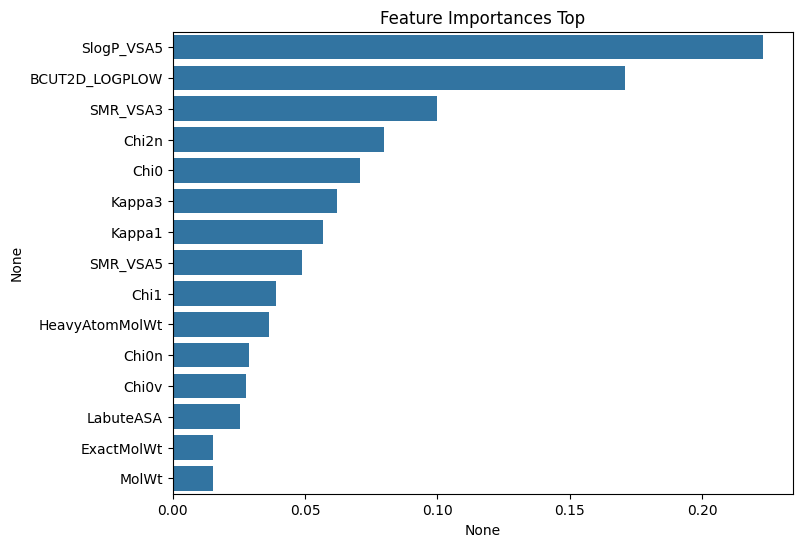
##### top
SlogP_VSA5        0.222996   
BCUT2D_LOGPLOW    0.170899   
SMR_VSA3          0.099971   
Chi2n             0.079974   
Chi0              0.070854   
Kappa3            0.061929   
Kappa1            0.056665   
SMR_VSA5          0.049032   
Chi1              0.038974   
HeavyAtomMolWt    0.036546   
Chi0n             0.028750   
Chi0v             0.027585   
LabuteASA         0.025448   
ExactMolWt        0.015247   
MolWt             0.015133

Chi2n, NumAromaticHeterocycles, SlogP_VSA5, BCUT2D_LOGPLOW, SMR_VSA3, Chi0, Kappa1

### 2. 데이터 전처리

In [5]:
train_df

,pIC50,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,BCUT2D_LOGPLOW,BertzCT,Chi0,Chi0n,Chi0v,...,NOCount,NumAromaticCarbocycles,NumAromaticHeterocycles,NumHAcceptors,NumHeteroatoms,NumRotatableBonds,MolMR,fr_NH0,fr_benzene,fr_pyridine
0,10.59,535.624,501.352,535.270716,206,-2.500926,1405.892793,27.310826,22.307719,22.307719,...,10,1,2,8,11,7,144.7415,6,1,0
1,10.11,537.596,505.340,537.249981,206,-2.563125,1408.871656,27.310826,22.008861,22.008861,...,11,1,2,9,12,7,141.7095,6,1,0
2,10.09,545.566,515.326,545.236222,208,-2.476253,1382.863661,27.896612,21.649435,21.649435,...,10,1,2,8,13,8,137.9735,6,1,0
3,10.00,571.604,539.348,571.251873,218,-2.567951,1488.807437,29.103719,22.856542,22.856542,...,10,1,2,8,13,7,145.0715,6,1,0
4,10.00,473.537,446.321,473.217538,180,-2.455375,1448.073885,24.156125,19.769469,19.769469,...,10,1,3,8,10,4,129.4652,6,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1921,4.58,561.085,531.853,560.197904,204,-2.431345,1709.043909,27.760573,22.516347,23.272276,...,6,3,2,5,7,5,163.6712,3,3,1
1922,4.52,283.247,274.175,283.070539,104,-2.125416,767.959163,14.819626,10.607838,10.607838,...,8,1,0,5,8,3,74.0543,3,1,1
1923,4.52,327.815,309.671,327.113840,118,-2.157531,841.153910,16.233840,12.920762,13.676691,...,4,2,1,3,5,5,94.0462,2,2,0
1924,4.52,318.239,310.175,318.056447,116,-2.126023,899.917121,16.560113,11.339203,11.339203,...,7,2,1,4,9,3,77.0593,2,2,0


In [6]:
test_df

,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,BCUT2D_LOGPLOW,BertzCT,Chi0,Chi0n,Chi0v,Chi1,...,NOCount,NumAromaticCarbocycles,NumAromaticHeterocycles,NumHAcceptors,NumHeteroatoms,NumRotatableBonds,MolMR,fr_NH0,fr_benzene,fr_pyridine
0,477.634,446.386,477.219846,178,-2.362354,1105.388583,23.329852,19.496743,20.313239,16.636163,...,7,1,2,7,8,7,136.7659,3,1,1
1,466.593,436.353,466.259343,178,-2.290902,1365.593121,23.614309,19.820745,19.820745,17.280321,...,8,1,3,8,8,5,136.4374,6,1,0
2,415.505,390.305,415.223292,158,-2.221784,1071.106189,21.045395,17.174861,17.174861,15.280321,...,9,1,2,9,9,6,119.1138,5,1,0
3,498.591,468.351,498.249172,190,-2.321047,1290.480108,25.614309,20.560272,20.560272,18.106019,...,10,1,2,9,10,8,140.1721,5,1,0
4,444.543,416.319,444.238608,170,-2.214788,1130.111141,22.622745,18.444917,18.444917,16.174168,...,9,1,2,9,9,6,126.0198,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,454.538,428.330,454.222957,172,-2.369215,1355.003353,22.907202,18.891750,18.891750,16.797158,...,9,1,3,9,9,4,128.9737,7,1,0
109,561.756,522.444,561.288594,212,-2.439040,1296.395880,28.061903,23.521306,24.337803,19.351377,...,9,1,2,8,10,8,162.1456,4,1,1
110,429.532,402.316,429.238942,164,-2.290771,1087.400007,21.752502,17.881968,17.881968,15.780321,...,9,1,2,9,9,6,123.7308,5,1,0
111,411.469,390.301,411.180758,154,-2.372648,1287.711257,21.371668,17.140673,17.140673,15.118525,...,8,1,3,7,8,3,115.3260,7,1,0


In [10]:
train_columns = ['pIC50', 'Chi2n', 'NumAromaticHeterocycles', 'SlogP_VSA5', 'BCUT2D_LOGPLOW', 'SMR_VSA3', 'Chi0', 'Kappa1']
test_columns = ['Chi2n', 'NumAromaticHeterocycles', 'SlogP_VSA5', 'BCUT2D_LOGPLOW', 'SMR_VSA3', 'Chi0', 'Kappa1']
train_df_sel = train_df[train_columns]
test_df_sel = test_df[test_columns]

### 3. csv 파일 저장

In [12]:
train_df_sel.to_csv('../rdkit_data/rdkit_train_select_columns.csv', index=False)
test_df_sel.to_csv('../rdkit_data/rdkit_test_select_columns.csv', index=False)